In [1]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

FILE_PATH = '../clean_data.csv';

TRAIN_TO_TEST_RATIO = 0.8
TRAIN_FILE_NAME = '../data/train.csv'
TEST_FILE_NAME = '../data/test.csv'
CORR_FILE_NAME = '../data/corr.png'


In [11]:
data = pn.read_csv(FILE_PATH)
selection = np.random.randn(len(data)) < TRAIN_TO_TEST_RATIO

train = data[selection]
test = data[~selection]

In [12]:
train.describe()

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
count,795.000000,795.000000,795.000000,795.000000,7.950000e+02,795.000000,795.000000,795.000000,795.000000
mean,1.499636,17.557743,925.086097,6.021528,1.248238e+06,1.047393,189.673234,426.003775,1.471931
std,0.029293,4.347306,14.533886,2.303865,4.306066e+05,0.551026,63.119288,32.306228,0.027689
min,1.450000,10.000000,900.000000,2.000000,5.000000e+05,0.100000,80.000000,337.000000,1.418000
25%,1.474500,13.798550,912.572400,4.076300,8.747473e+05,0.569900,135.585400,402.000000,1.448750
50%,1.499500,17.554800,925.145400,5.960600,1.260871e+06,1.049000,189.127900,421.333300,1.471700
75%,1.525450,21.328450,937.779150,8.006700,1.609107e+06,1.524150,244.210050,452.000000,1.495100
max,1.550000,25.000000,950.000000,10.000000,2.000000e+06,2.000000,300.000000,488.666700,1.522800


In [13]:
train.sample(5)

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
114,1.4560,24.2592,939.5116,8.7808,6.261701e+05,0.2977,261.7583,410.3333,1.4320
216,1.5134,16.4242,937.8786,2.6348,1.899221e+06,1.1880,207.4840,447.6667,1.4870
481,1.4705,10.7839,943.7935,7.5765,1.667271e+06,0.9401,264.3192,475.3333,1.4411
428,1.5217,20.3084,939.2598,8.5823,1.784802e+06,1.5687,82.8606,414.0000,1.4951
24,1.4927,24.3930,941.9637,6.2148,1.824160e+06,0.9643,195.4047,418.6667,1.4674


In [41]:
data_norm = pn.DataFrame(normalize(data))
data_norm.describe()

,0,1,2,3,4,5,6,7,8
count,9.990000e+02,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000,9.990000e+02
mean,1.387164e-06,0.000016,0.000855,0.000006,9.999995e-01,9.772140e-07,0.000176,0.000393,1.361668e-06
std,5.755012e-07,0.000008,0.000355,0.000003,4.679085e-07,7.006261e-07,0.000095,0.000165,5.653116e-07
min,7.323550e-07,0.000005,0.000454,0.000001,9.999978e-01,5.731632e-08,0.000042,0.000188,7.186104e-07
25%,9.228987e-07,0.000010,0.000569,0.000003,9.999993e-01,4.548033e-07,0.000106,0.000261,9.065966e-07
50%,1.204476e-06,0.000014,0.000743,0.000005,9.999997e-01,8.416215e-07,0.000156,0.000343,1.183083e-06
75%,1.719566e-06,0.000020,0.001053,0.000007,9.999998e-01,1.264611e-06,0.000223,0.000483,1.688770e-06
max,3.095471e-06,0.000046,0.001849,0.000019,9.999999e-01,3.933324e-06,0.000596,0.000943,3.036301e-06


In [42]:
data_norm.sample(5)

,0,1,2,3,4,5,6,7,8
546,0.000002,0.000016,0.001110,0.000010,0.999999,4.819432e-07,0.000245,0.000540,0.000002
125,0.000002,0.000033,0.001318,0.000005,0.999999,1.905542e-06,0.000377,0.000564,0.000002
206,0.000001,0.000011,0.000836,0.000003,1.000000,1.586199e-06,0.000131,0.000429,0.000001
926,0.000001,0.000012,0.000702,0.000007,1.000000,3.651488e-07,0.000226,0.000315,0.000001
905,0.000002,0.000022,0.000964,0.000002,0.999999,1.204748e-06,0.000263,0.000430,0.000002


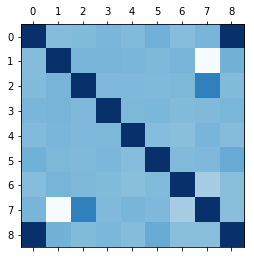

In [45]:
plt.matshow(data.corr(method='pearson'), cmap='Blues', interpolation='nearest')

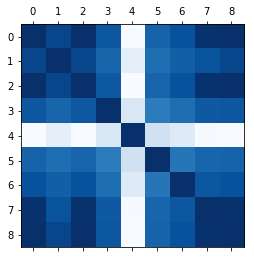

In [46]:
plt.matshow(data_norm.corr(method='pearson'), cmap='Blues', interpolation='nearest')

In [7]:
# train.to_csv(TRAIN_FILE_NAME)
# test.to_csv(TEST_FILE_NAME)
# plt.matshow(data.corr(), cmap='Blues', interpolation='nearest')
# plt.savefig(CORR_FILE_NAME)
